In [246]:
# Initial imports
import os
import requests
import pandas as pd
import json
from dotenv import load_dotenv
import alpaca_trade_api as tradeapi
from MCForecastTools import MCSimulation

%matplotlib inline

In [247]:
# Load .env enviroment variables
load_dotenv()

True

## Part 1 - Personal Finance Planner

### Collect Crypto Prices Using the `requests` Library

In [248]:
# Set current amount of crypto assets
my_btc = 1.2
my_eth = 5.3

In [249]:
# Crypto API URLs
btc_url = "https://api.alternative.me/v2/ticker/Bitcoin/?convert=CAD"
eth_url = "https://api.alternative.me/v2/ticker/Ethereum/?convert=CAD"

In [250]:
# Fetch current BTC price
btc_data = requests.get(btc_url).json()
btc_data

btc_price = btc_data['data']['1']['quotes']['USD']['price']
btc_price

41883.0

In [251]:
# Fetch current ETH price
eth_data = requests.get(eth_url).json()
eth_data

eth_price = eth_data['data']['1027']['quotes']['USD']['price']
eth_price

3149.2

In [252]:
# Compute current value of my crpto
my_btc_value = my_btc * btc_price

my_eth_value = my_eth * eth_price

# Print current crypto wallet balance
print(f"The current value of your {my_btc} BTC is ${my_btc_value:0.2f}")
print(f"The current value of your {my_eth} ETH is ${my_eth_value:0.2f}")

The current value of your 1.2 BTC is $50259.60
The current value of your 5.3 ETH is $16690.76


### Collect Investments Data Using Alpaca: `SPY` (stocks) and `AGG` (bonds)

In [253]:
# Set current amount of shares
my_agg = 200
my_spy = 50

In [254]:
# Set Alpaca API key and secret
alpaca_api_key = os.getenv("ALPACA_API_KEY")
alpaca_secret_key = os.getenv("ALPACA_SECRET_KEY")

# Create the Alpaca API object
alpaca = tradeapi.REST(
    alpaca_api_key,
    alpaca_secret_key,
    api_version="v2")

In [255]:
# Format current date as ISO format
start = pd.Timestamp("2018-01-14", tz="America/New_York").isoformat()
end = pd.Timestamp("2022-01-14", tz="America/New_York").isoformat()

# Set the tickers
tickers = ["AGG", "SPY"]

# Set timeframe to '1D' for Alpaca API
timeframe = "1D"

# Get current closing prices for SPY and AGG
# (use a limit=1000 parameter to call the most recent 1000 days of data)
my_portfolio = alpaca.get_barset(
    tickers,
    timeframe,
    start = start,
    end = end,
    limit = 1000
).df

# Preview DataFrame
my_portfolio.tail(10)

AGG                                         \
                             open      high       low   close     volume   
time                                                                       
2022-01-03 00:00:00-05:00  113.67  113.6753  113.3100  113.31  8906643.0   
2022-01-04 00:00:00-05:00  113.22  113.3000  113.0750  113.29  7615698.0   
2022-01-05 00:00:00-05:00  113.34  113.3600  112.9000  112.93  7686662.0   
2022-01-06 00:00:00-05:00  112.75  112.8400  112.6600  112.81  6812819.0   
2022-01-07 00:00:00-05:00  112.69  112.7050  112.3400  112.50  8338975.0   
2022-01-10 00:00:00-05:00  112.23  112.4200  112.1427  112.41  6475269.0   
2022-01-11 00:00:00-05:00  112.33  112.6300  112.2650  112.61  5746688.0   
2022-01-12 00:00:00-05:00  112.72  112.7850  112.5800  112.60  6159865.0   
2022-01-13 00:00:00-05:00  112.60  112.8000  112.5100  112.80  7925476.0   
2022-01-14 00:00:00-05:00  112.53  112.5450  112.1500  112.17  8362916.0   

                              SPY                                         
                             open    high       low   close       volume  
time                                                                      
2022-01-03 00:00:00-05:00  476.32  477.85  473.8500  477.76   56128214.0  
2022-01-04 00:00:00-05:00  479.22  479.98  475.5800  477.51   59093344.0  
2022-01-05 00:00:00-05:00  477.16  477.98  468.2801  468.38   87411658.0  
2022-01-06 00:00:00-05:00  467.89  470.82  465.4300  467.93   78577470.0  
2022-01-07 00:00:00-05:00  467.95  469.20  464.6500  466.12   67943055.0  
2022-01-10 00:00:00-05:00  462.70  465.74  456.5973  465.56  106360848.0  
2022-01-11 00:00:00-05:00  465.19  469.85  462.0500  469.74   63007023.0  
2022-01-12 00:00:00-05:00  471.59  473.20  468.9400  471.06   58775301.0  
2022-01-13 00:00:00-05:00  472.21  472.88  463.4400  464.54   79071832.0  
2022-01-14 00:00:00-05:00  461.19  465.09  459.9000  464.68   84363989.0

In [256]:
# Pick AGG and SPY close prices
agg_close_price = my_portfolio["AGG"]["close"][-1]
spy_close_price = my_portfolio["SPY"]["close"][-1]

# Print AGG and SPY close prices
print(f"Current AGG closing price: ${agg_close_price}")
print(f"Current SPY closing price: ${spy_close_price}")

Current AGG closing price: $112.17
Current SPY closing price: $464.68


In [257]:
# Compute the current value of shares
my_agg_value = my_agg * agg_close_price

my_spy_value = my_spy * spy_close_price

# Print current value of shares

print(f"The current value of your {my_agg} AGG shares is ${my_agg_value:0.2f}")
print(f"The current value of your {my_spy} SPY shares is ${my_spy_value:0.2f}")

The current value of your 200 AGG shares is $22434.00
The current value of your 50 SPY shares is $23234.00


### Savings Health Analysis

In [259]:
# Set monthly household income
monthly_income = 12000

# Consolidate financial assets data
crypto = my_btc_value + my_eth_value 

shares = my_agg_value + my_spy_value 

# Create savings DataFrame

# Set the assets
assets = ["CRYPTO", "SHARES"]

# Set current amount of savings per asset
amount = {
    "AMOUNT": [crypto, shares]
}

#savings DataFrame
df_savings = pd.DataFrame(amount, index=assets)

# Display savings DataFrame
display(df_savings)

,AMOUNT
CRYPTO,66950.36
SHARES,45668.00


<AxesSubplot:title={'center':'Composition of Personal Savings'}, ylabel='AMOUNT'>

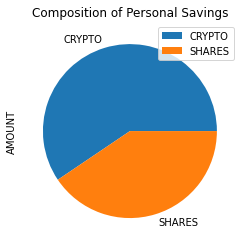

In [260]:
# Plot savings pie chart
df_savings.plot.pie(y="AMOUNT", title="Composition of Personal Savings")

In [262]:
# Set ideal emergency fund
emergency_fund = monthly_income * 3

# Calculate total amount of savings
total_savings = df_savings["AMOUNT"].sum()


# Calculate total amount away from savings goal

away_from_goal = emergency_fund - total_savings
away_from_goal

# Validate saving health

if total_savings > emergency_fund:
    print("Congratulations! You have enough money in your emergency fund.")
elif total_savings == emergency_fund:
    print("Congratulations! You have reached your financial goal.")
else:
    print(f"You are ${away_from_goal} away from your financial goal.")   

Congratulations! You have enough money in your emergency fund.


## Part 2 - Retirement Planning

### Monte Carlo Simulation

In [200]:
# Set start and end dates of five years back from today.
start_date = pd.Timestamp('2017-01-14', tz='America/New_York').isoformat()
end_date = pd.Timestamp('2022-01-14', tz='America/New_York').isoformat()

In [201]:
# Get 5 years' worth of historical data for SPY and AGG
df_stock_data = alpaca.get_barset(
    tickers,
    timeframe,
    start=start_date,
    end=end_date,
    limit=1000,
).df

# Display sample data
df_stock_data.head()

AGG                                       \
                             open     high     low    close     volume   
time                                                                     
2018-01-26 00:00:00-05:00  108.51  108.510  108.27  108.380  2226605.0   
2018-01-29 00:00:00-05:00  108.14  108.210  108.02  108.190  3532887.0   
2018-01-30 00:00:00-05:00  108.12  108.120  107.92  108.005  2965870.0   
2018-01-31 00:00:00-05:00  108.20  108.210  107.88  108.090  5729791.0   
2018-02-01 00:00:00-05:00  107.75  107.825  107.48  107.490  8569565.0   

                              SPY                                      
                             open    high     low   close      volume  
time                                                                   
2018-01-26 00:00:00-05:00     NaN     NaN     NaN     NaN         NaN  
2018-01-29 00:00:00-05:00  285.97  286.43  284.50  284.68  60825439.0  
2018-01-30 00:00:00-05:00  282.59  283.29  281.22  281.66  86366361.0  
2018-01-31 00:00:00-05:00  282.73  283.30  280.68  281.91  76360186.0  
2018-02-01 00:00:00-05:00  281.04  283.06  280.68  281.60  64693558.0

In [202]:
# Configuring a Monte Carlo simulation to forecast 30 years cumulative returns
MC_30_years = MCSimulation(
    portfolio_data = df_stock_data,
    weights = [.40,.60],
    num_simulation = 500,
    num_trading_days = 252*30
)

In [205]:
# Printing the simulation input data
MC_30_years.portfolio_data.head()

AGG                                       \
                             open     high     low    close     volume   
time                                                                     
2018-01-26 00:00:00-05:00  108.51  108.510  108.27  108.380  2226605.0   
2018-01-29 00:00:00-05:00  108.14  108.210  108.02  108.190  3532887.0   
2018-01-30 00:00:00-05:00  108.12  108.120  107.92  108.005  2965870.0   
2018-01-31 00:00:00-05:00  108.20  108.210  107.88  108.090  5729791.0   
2018-02-01 00:00:00-05:00  107.75  107.825  107.48  107.490  8569565.0   

                                           SPY                          \
                          daily_return    open    high     low   close   
time                                                                     
2018-01-26 00:00:00-05:00          NaN     NaN     NaN     NaN     NaN   
2018-01-29 00:00:00-05:00    -0.001753  285.97  286.43  284.50  284.68   
2018-01-30 00:00:00-05:00    -0.001710  282.59  283.29  281.22  281.66   
2018-01-31 00:00:00-05:00     0.000787  282.73  283.30  280.68  281.91   
2018-02-01 00:00:00-05:00    -0.005551  281.04  283.06  280.68  281.60   

                                                    
                               volume daily_return  
time                                                
2018-01-26 00:00:00-05:00         NaN          NaN  
2018-01-29 00:00:00-05:00  60825439.0          NaN  
2018-01-30 00:00:00-05:00  86366361.0    -0.010608  
2018-01-31 00:00:00-05:00  76360186.0     0.000888  
2018-02-01 00:00:00-05:00  64693558.0    -0.001100

In [206]:
# Running a Monte Carlo simulation to forecast 30 years cumulative returns
MC_30_years.calc_cumulative_return()

Running Monte Carlo simulation number 0.
Running Monte Carlo simulation number 10.
Running Monte Carlo simulation number 20.
Running Monte Carlo simulation number 30.
Running Monte Carlo simulation number 40.
Running Monte Carlo simulation number 50.
Running Monte Carlo simulation number 60.
Running Monte Carlo simulation number 70.
Running Monte Carlo simulation number 80.
Running Monte Carlo simulation number 90.
Running Monte Carlo simulation number 100.


/Users/juanraigosa/Desktop/Class/02-Homework/05-APIs/Instructions/Starter_Code/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead.  To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()


Running Monte Carlo simulation number 110.
Running Monte Carlo simulation number 120.
Running Monte Carlo simulation number 130.
Running Monte Carlo simulation number 140.
Running Monte Carlo simulation number 150.
Running Monte Carlo simulation number 160.
Running Monte Carlo simulation number 170.
Running Monte Carlo simulation number 180.
Running Monte Carlo simulation number 190.
Running Monte Carlo simulation number 200.
Running Monte Carlo simulation number 210.
Running Monte Carlo simulation number 220.
Running Monte Carlo simulation number 230.
Running Monte Carlo simulation number 240.
Running Monte Carlo simulation number 250.
Running Monte Carlo simulation number 260.
Running Monte Carlo simulation number 270.
Running Monte Carlo simulation number 280.
Running Monte Carlo simulation number 290.
Running Monte Carlo simulation number 300.
Running Monte Carlo simulation number 310.
Running Monte Carlo simulation number 320.
Running Monte Carlo simulation number 330.
Running Mon

,0,1,2,3,4,5,6,7,8,9,...,490,491,492,493,494,495,496,497,498,499
0,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
1,1.008762,1.011453,1.004972,1.011097,0.994733,1.006150,0.990963,0.999635,1.005319,1.001984,...,1.007597,1.007325,0.996999,1.018958,1.011728,0.999222,0.995739,1.006984,1.005762,0.992337
2,0.996512,1.010219,1.009028,1.004149,1.000668,1.014442,0.995557,0.980739,1.004331,1.008122,...,0.999426,0.996440,1.002491,1.027389,1.019089,0.991128,0.991548,1.012919,1.011464,0.999672
3,0.995652,1.012195,1.013439,1.011045,1.006311,1.014497,0.997092,0.980736,1.004376,1.008355,...,1.001324,0.986242,1.001720,1.022144,1.027257,0.981848,0.983176,1.001238,1.019105,0.989786
4,1.009524,1.012166,1.009666,1.008035,0.996949,1.014996,0.995408,0.975726,0.990765,1.005185,...,1.018790,0.988905,0.997169,1.027035,1.041326,0.989158,0.960561,1.011377,1.013053,0.987551
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7556,35.150602,8.886450,10.207810,7.148276,5.974982,11.423499,9.761411,14.255679,6.855362,22.935139,...,9.380102,18.749453,12.860761,32.486856,9.827969,4.734533,6.282015,36.912630,8.370843,13.310961
7557,34.996615,8.911377,10.240545,7.213656,5.990491,11.390432,9.768603,14.496522,6.819278,23.018886,...,9.345430,18.672580,12.743154,32.274166,9.953485,4.752114,6.168645,36.669397,8.256119,13.450528
7558,34.801925,8.769645,10.162542,7.143365,6.045011,11.462960,9.760020,14.501496,6.839231,22.929794,...,9.265835,18.710217,12.712472,32.665332,10.023197,4.711148,6.064191,36.492268,8.270825,13.460355
7559,34.763690,8.801009,10.208557,7.202070,6.004822,11.372567,9.753533,14.478403,6.749453,22.821314,...,9.380218,18.958305,12.666973,32.903231,10.007487,4.722400,6.064522,36.688139,8.234874,13.480139


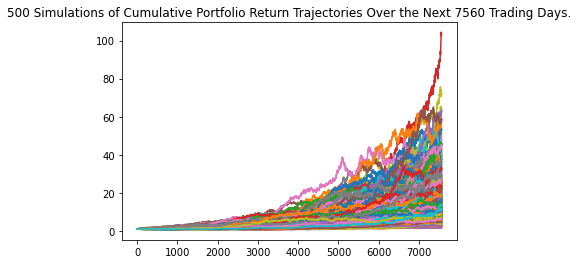

In [215]:
# Plot simulation outcomes
line_plot = MC_30_years.plot_simulation()

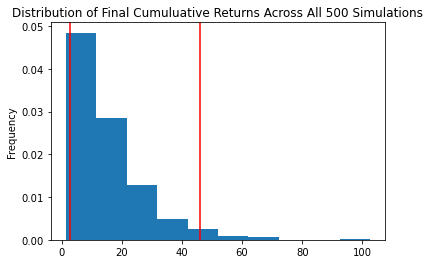

In [216]:
# Plot probability distribution and confidence intervals
dist_plot = MC_30_years.plot_distribution()

### Retirement Analysis

In [218]:
# Fetch summary statistics from the Monte Carlo simulation results
tbl = MC_30_years.summarize_cumulative_return()

# Print summary statistics
print(tbl)

count           500.000000
mean             15.421605
std              12.003646
min               1.396508
25%               7.567568
50%              11.648647
75%              19.529093
max             102.571320
95% CI Lower      2.880453
95% CI Upper     45.958513
Name: 7560, dtype: float64


### Calculate the expected portfolio return at the `95%` lower and upper confidence intervals based on a `$20,000` initial investment.

In [221]:
# Set initial investment
initial_investment = 20000

# Use the lower and upper `95%` confidence intervals to calculate the range of the possible outcomes of our $20,000
ci_lower = round(tbl[8] * initial_investment,2)
ci_upper = round(tbl[9] * initial_investment,2)

# Print results
print(f"There is a 95% chance that an initial investment of ${initial_investment} in the portfolio"
      f" over the next 30 years will end within in the range of"
      f" ${ci_lower} and ${ci_upper}")

There is a 95% chance that an initial investment of $20000 in the portfolio over the next 30 years will end within in the range of $57609.05 and $919170.26


### Calculate the expected portfolio return at the `95%` lower and upper confidence intervals based on a `50%` increase in the initial investment.

In [222]:
# Set initial investment
initial_investment = 20000 * 1.5

# Use the lower and upper `95%` confidence intervals to calculate the range of the possible outcomes of our $30,000
ci_lower = round(tbl[8] * initial_investment,2)
ci_upper = round(tbl[9] * initial_investment,2)

# Print results
print(f"There is a 95% chance that an initial investment of ${initial_investment} in the portfolio"
      f" over the next 30 years will end within in the range of"
      f" ${ci_lower} and ${ci_upper}")

There is a 95% chance that an initial investment of $30000.0 in the portfolio over the next 30 years will end within in the range of $86413.58 and $1378755.38


## Optional Challenge - Early Retirement


### Five Years Retirement Option

In [224]:
# Configuring a Monte Carlo simulation to forecast 5 years cumulative returns, 30% AGG / 70% SPY
MC_5_years = MCSimulation(
    portfolio_data = df_stock_data,
    weights = [.30,.70],
    num_simulation = 500,
    num_trading_days = 252*5
)

In [225]:
# Running a Monte Carlo simulation to forecast 5 years cumulative returns
MC_5_years.calc_cumulative_return()

Running Monte Carlo simulation number 0.
Running Monte Carlo simulation number 10.
Running Monte Carlo simulation number 20.
Running Monte Carlo simulation number 30.
Running Monte Carlo simulation number 40.
Running Monte Carlo simulation number 50.
Running Monte Carlo simulation number 60.
Running Monte Carlo simulation number 70.
Running Monte Carlo simulation number 80.
Running Monte Carlo simulation number 90.
Running Monte Carlo simulation number 100.


/Users/juanraigosa/Desktop/Class/02-Homework/05-APIs/Instructions/Starter_Code/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead.  To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()


Running Monte Carlo simulation number 110.
Running Monte Carlo simulation number 120.
Running Monte Carlo simulation number 130.
Running Monte Carlo simulation number 140.
Running Monte Carlo simulation number 150.
Running Monte Carlo simulation number 160.
Running Monte Carlo simulation number 170.
Running Monte Carlo simulation number 180.
Running Monte Carlo simulation number 190.
Running Monte Carlo simulation number 200.
Running Monte Carlo simulation number 210.
Running Monte Carlo simulation number 220.
Running Monte Carlo simulation number 230.
Running Monte Carlo simulation number 240.
Running Monte Carlo simulation number 250.
Running Monte Carlo simulation number 260.
Running Monte Carlo simulation number 270.
Running Monte Carlo simulation number 280.
Running Monte Carlo simulation number 290.
Running Monte Carlo simulation number 300.
Running Monte Carlo simulation number 310.
Running Monte Carlo simulation number 320.
Running Monte Carlo simulation number 330.
Running Mon

,0,1,2,3,4,5,6,7,8,9,...,490,491,492,493,494,495,496,497,498,499
0,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
1,1.010984,1.023656,1.021542,0.987316,1.009748,1.005498,0.983372,1.013585,0.990751,0.990545,...,0.993012,0.980441,1.005098,1.003957,1.017107,1.003473,0.989860,1.005090,1.016705,1.000090
2,0.987411,1.029648,1.012858,0.985184,1.012243,1.006839,0.989194,1.008405,0.992111,0.974139,...,1.014631,0.991582,1.004771,1.000981,1.034924,1.020861,0.976382,1.014092,1.021742,1.001635
3,0.986694,1.038544,1.020522,0.996395,1.020676,1.011616,0.996721,1.010337,0.993309,0.965251,...,1.016477,1.001666,0.983136,0.999470,1.040888,1.021876,0.984029,1.018571,1.015186,1.005144
4,0.984500,1.040036,1.032154,1.006398,1.011557,1.002540,0.987279,1.009302,0.992133,0.969328,...,1.016833,1.002772,0.981371,1.003685,1.046596,1.030394,0.994095,1.009705,1.010784,0.987724
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1256,1.972398,2.654819,1.328378,1.824277,1.547644,1.114826,1.033651,0.917727,1.077424,0.922155,...,1.690720,1.305675,2.433538,2.523038,2.463526,1.314635,1.983688,1.995177,1.481715,1.335475
1257,1.991385,2.626335,1.352498,1.829011,1.552204,1.114434,1.032375,0.926318,1.073099,0.928745,...,1.689515,1.292162,2.432095,2.549455,2.453786,1.338867,1.985922,1.980527,1.492818,1.361252
1258,2.000716,2.641475,1.334198,1.823860,1.544939,1.114729,1.041465,0.943139,1.079665,0.929895,...,1.664024,1.273656,2.438951,2.524710,2.434170,1.344769,1.956545,1.963042,1.491895,1.355200
1259,1.990218,2.643202,1.337957,1.848516,1.555289,1.133440,1.032237,0.945559,1.085277,0.922494,...,1.695148,1.272191,2.445668,2.542625,2.466179,1.356365,1.943181,1.984671,1.501056,1.363513


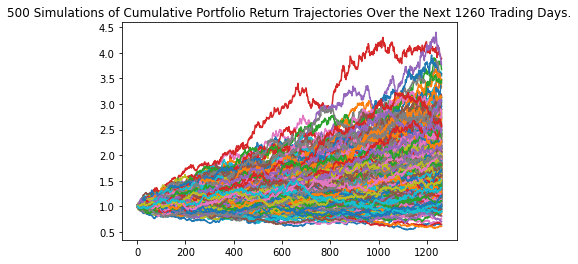

In [226]:
# Plot simulation outcomes
line_plot = MC_5_years.plot_simulation()

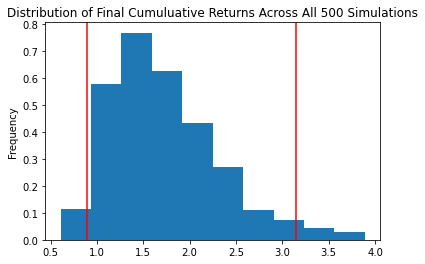

In [227]:
# Plot probability distribution and confidence intervals
dist_plot = MC_5_years.plot_distribution()

In [231]:
# Fetch summary statistics from the Monte Carlo simulation results
tbl = MC_5_years.summarize_cumulative_return()

# Print summary statistics
print(tbl)

count           500.000000
mean              1.723796
std               0.592017
min               0.606745
25%               1.289037
50%               1.613055
75%               2.053730
max               3.889571
95% CI Lower      0.894032
95% CI Upper      3.147156
Name: 1260, dtype: float64


In [237]:
# Set initial investment
initial_investment = 60000

# Use the lower and upper `95%` confidence intervals to calculate the range of the possible outcomes of our $60,000
ci_lower_five = round(tbl[8] * initial_investment,2)
ci_upper_five = round(tbl[9] * initial_investment,2)

# Print results
print(f"There is a 95% chance that an initial investment of ${initial_investment} in the portfolio"
      f" over the next 5 years will end within in the range of"
      f" ${ci_lower_five} and ${ci_upper_five}")

There is a 95% chance that an initial investment of $60000 in the portfolio over the next 5 years will end within in the range of $53641.94 and $188829.35


### Ten Years Retirement Option

In [239]:
# Configuring a Monte Carlo simulation to forecast 10 years cumulative returns, 30% AGG / 70% SPY
MC_10_years = MCSimulation(
    portfolio_data = df_stock_data,
    weights = [.30,.70],
    num_simulation = 500,
    num_trading_days = 252*10
)

In [240]:
# Running a Monte Carlo simulation to forecast 10 years cumulative returns
MC_10_years.calc_cumulative_return()

Running Monte Carlo simulation number 0.
Running Monte Carlo simulation number 10.
Running Monte Carlo simulation number 20.
Running Monte Carlo simulation number 30.
Running Monte Carlo simulation number 40.
Running Monte Carlo simulation number 50.
Running Monte Carlo simulation number 60.
Running Monte Carlo simulation number 70.
Running Monte Carlo simulation number 80.
Running Monte Carlo simulation number 90.
Running Monte Carlo simulation number 100.


/Users/juanraigosa/Desktop/Class/02-Homework/05-APIs/Instructions/Starter_Code/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead.  To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()


Running Monte Carlo simulation number 110.
Running Monte Carlo simulation number 120.
Running Monte Carlo simulation number 130.
Running Monte Carlo simulation number 140.
Running Monte Carlo simulation number 150.
Running Monte Carlo simulation number 160.
Running Monte Carlo simulation number 170.
Running Monte Carlo simulation number 180.
Running Monte Carlo simulation number 190.
Running Monte Carlo simulation number 200.
Running Monte Carlo simulation number 210.
Running Monte Carlo simulation number 220.
Running Monte Carlo simulation number 230.
Running Monte Carlo simulation number 240.
Running Monte Carlo simulation number 250.
Running Monte Carlo simulation number 260.
Running Monte Carlo simulation number 270.
Running Monte Carlo simulation number 280.
Running Monte Carlo simulation number 290.
Running Monte Carlo simulation number 300.
Running Monte Carlo simulation number 310.
Running Monte Carlo simulation number 320.
Running Monte Carlo simulation number 330.
Running Mon

,0,1,2,3,4,5,6,7,8,9,...,490,491,492,493,494,495,496,497,498,499
0,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
1,1.024613,0.995197,1.007123,0.998336,1.010422,1.000398,0.986876,1.001632,1.000341,1.005118,...,1.001496,0.998302,0.998710,1.000332,1.002104,1.016027,0.984791,0.995777,1.008715,1.005461
2,1.018779,0.984508,0.998842,1.000019,0.996632,1.025486,0.985071,1.004517,1.025875,0.996623,...,1.007053,1.001967,1.004975,1.006528,0.987890,1.013407,0.993696,0.998689,0.997556,1.001731
3,1.011556,0.992257,0.993780,1.007997,0.995432,1.023050,1.002254,1.007358,1.024558,1.003142,...,0.996855,1.010366,1.004539,1.005957,0.987768,1.010270,0.999762,1.008163,0.985347,1.011295
4,1.021008,0.996240,0.995330,1.015617,0.984700,1.034717,0.997892,1.004527,1.021348,0.997813,...,1.011978,1.003958,1.000339,1.002409,1.001531,1.020776,0.986961,1.001387,1.002922,1.014231
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2516,3.025281,3.400914,4.402079,2.222260,1.624950,4.505607,2.137872,3.162422,4.038299,3.768775,...,3.103495,2.044351,4.310346,1.768116,6.319692,2.346991,9.405105,4.179292,1.344616,1.390781
2517,3.057735,3.411125,4.453446,2.188482,1.646739,4.475464,2.139159,3.159869,4.017911,3.721470,...,3.056326,2.027116,4.357632,1.755741,6.374375,2.350757,9.306213,4.112384,1.332292,1.384838
2518,3.091479,3.416707,4.441604,2.172024,1.657513,4.421103,2.148578,3.170544,4.026823,3.752115,...,3.031674,2.018481,4.354804,1.734478,6.256620,2.367022,9.328351,4.062294,1.298617,1.391407
2519,3.077949,3.391811,4.370902,2.175623,1.648256,4.455551,2.156907,3.235448,4.050192,3.778527,...,3.032640,2.010037,4.430164,1.754709,6.292586,2.377030,9.255596,4.138699,1.296598,1.377745


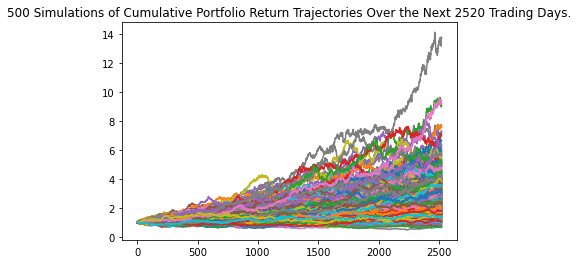

In [241]:
# Plot simulation outcomes
line_plot = MC_10_years.plot_simulation()

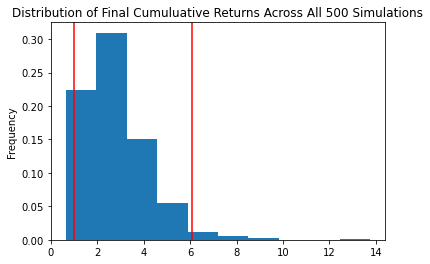

In [242]:
# Plot probability distribution and confidence intervals
dist_plot = MC_10_years.plot_distribution()

In [243]:
# Fetch summary statistics from the Monte Carlo simulation results
tbl = MC_10_years.summarize_cumulative_return()

# Print summary statistics
print(tbl)

count           500.000000
mean              2.830135
std               1.434040
min               0.635733
25%               1.852148
50%               2.517778
75%               3.508365
max              13.753743
95% CI Lower      0.980808
95% CI Upper      6.065559
Name: 2520, dtype: float64


In [244]:
# Set initial investment
initial_investment = 60000

# Use the lower and upper `95%` confidence intervals to calculate the range of the possible outcomes of our $60,000
ci_lower_ten = round(tbl[8] * initial_investment,2)
ci_upper_ten = round(tbl[9] * initial_investment,2)

# Print results
print(f"There is a 95% chance that an initial investment of ${initial_investment} in the portfolio"
      f" over the next 10 years will end within in the range of"
      f" ${ci_lower_ten} and ${ci_upper_ten}")

There is a 95% chance that an initial investment of $60000 in the portfolio over the next 10 years will end within in the range of $58848.5 and $363933.54
